## MI10

### MI_BCCN_2022  Janel, Tarek, Luisa, Myriam

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
import pandas as pd
from sklearn import model_selection
from sklearn import metrics


## Exercise 2
### a

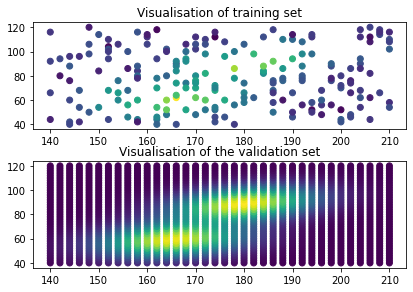

In [3]:
data_train = np.array(pd.read_csv('TrainingRidge.csv'))
data_valid = np.array(pd.read_csv('ValidationRidge.csv'))

x = np.array([data_train[:,0],data_train[:,1]])
y_T = data_train[:,2]
x_v = np.array([data_valid[:,0],data_valid[:,1]])
y_T_v = data_valid[:,2]


fig,ax = plt.subplots(2)
fig.tight_layout()
ax[0].scatter(x[0],  x[1], c = y_T)
ax[0].set_title('Visualisation of training set')
ax[1].scatter(x_v[0], x_v[1], c= y_T_v)
ax[1].set_title('Visualisation of the validation set')
plt.show()

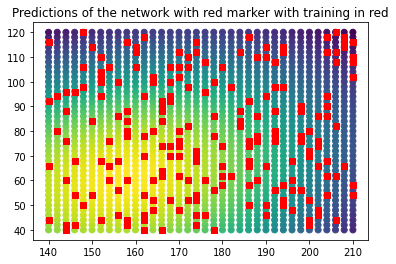

In [4]:
svr = NuSVR()
svr.fit(x.T,y_T)

predictions = svr.predict(x_v.T)

plt.scatter(x_v[0], x_v[1], c = predictions)
plt.scatter(x[0], x[1], c = 'red', marker = 's')
plt.title('Predictions of the network with red marker with training in red')
plt.show()


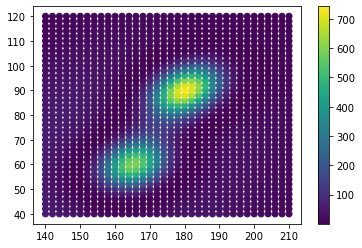

In [5]:
def MSE (a,b):
    return np.mean((a-b)**2)


mse = [MSE(a,b) for (a,b) in zip(predictions, y_T_v)]
plt.scatter(x_v[0], x_v[1], c = mse)
plt.colorbar()
plt.show()

The network makes really bad prediction error values are really high, especially with the 'clusters' of the data ( the two dots in the middle of the plot, where the 'true' values are the most different from the average true value)

## b)

In [7]:

def cross_val(X, y):
    C      = [2**i for i in range(-2,13)]
    gammas = [2**i for i in range(-12,0)]

    folds = 10
    batch_len = int(len(X)/folds)
    
    MSE_global =[]
    
    for c in C:
    
        MSE_local  =[]
        for gamma in gammas :
            MSE_local_local = []

            for i in range(folds):
                    
                indx = i*batch_len
                X_train_test = X[indx:indx+batch_len]
                X_train_train = np.concatenate((X[indx+batch_len:], X[:indx]), axis=0)
                y_test = y[indx:indx+batch_len]
                y_train = np.concatenate((y[indx+batch_len:], y[:indx]), axis=0)

                svr = NuSVR(kernel = 'rbf' ,nu =0.5, C=c, gamma = gamma)
                svr.fit(X_train_train,y_train)
                predictions = svr.predict(X_train_test)
                MSE_local_local.append(MSE (predictions, y_test))

            MSE_local.append(np.mean(MSE_local_local))
            
        MSE_global.append(MSE_local)

            
    return C,gammas,MSE_global

C,gammas,MSEs =cross_val(x.T, y_T)

Text(0, 0.5, 'C indices')

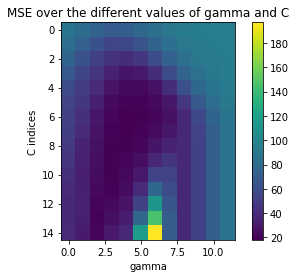

In [8]:


plt.imshow(MSEs)
plt.colorbar()
plt.title('MSE over the different values of gamma and C')
plt.xlabel('gamma')
plt.ylabel('C indices')


## c)

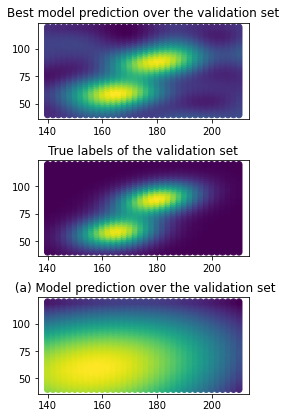

In [10]:

#finding the gamma and C matching the lowest MSE
for i in range (len(MSEs)):
    for j in range (len(MSEs[0])):
        if MSEs[i][j] == np.min(MSEs):
            C_best = C[i]
            gamma_best = gammas[j]

            

svr_best = NuSVR(kernel = 'rbf' ,nu =0.5, C=C_best, gamma = gamma_best)
svr_best.fit(x.T,y_T)
best_predictions = svr_best.predict(x_v.T)

fig,ax =  plt.subplots(3,  figsize = (4,6))
fig.tight_layout(pad=2)
ax[0].scatter (x_v[0], x_v[1], c = best_predictions)
ax[0].set_title('Best model prediction over the validation set')
ax[1].scatter(x_v[0], x_v[1], c =  y_T_v)
ax[1].set_title('True labels of the validation set')
ax[2].scatter(x_v[0], x_v[1], c= predictions)
ax[2].set_title(' (a) Model prediction over the validation set')
plt.show()

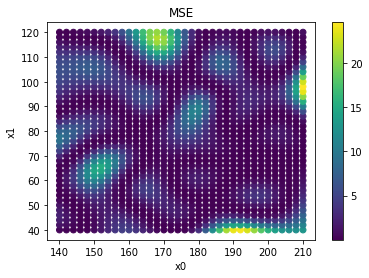

In [11]:

mse = [MSE(a,b) for (a,b) in zip(best_predictions, y_T_v)]
plt.scatter(x_v[0], x_v[1], c = mse)
plt.title('MSE')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar()
plt.show()

With the best network, the error is rather homogeneous over every point, and pretty low overall.